### Observations

What is the research directions or goals??

The size of each dataset differs a lot and some cases have too few records to infer new information. Data analysis is useful when the datasets are large!

- No correlation with diffs even when total and diff calls values are equal, the percentage change is almost the change and there is no conclusive way to determine if time and energy diffs are positive or negative. Since we don't know that the equal number of methods calls is proportionally distributed.
- Difficult to estimate change per method, since the energy and time are aggregated.
- Individual method stats will be necessary to measure refactor change pct.
- Given that the computer uses its full capacity for a given processing time unit as long as the time is reduced so is the energy. The percentage change is proportional for the positive and negative time and energy diffs. 
- Althought the number of positive is way too small due to the high standard deviation and variance.
- Consequence of merging the energy and time measurements.
- Achieved similar results when using different datasets, however some patterns show a different behavior when the number of egaps fixed and hits are equal therefore we cannot apply the same reasoning to all the patterns.

In [1]:
import numpy as np
import pandas as pd

%matplotlib inline

dataset='ViewHolder.csv'
figsize=(12,6)
bag=5

df = pd.read_csv('../datasets/' + dataset)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
EGAP(s)                              500 non-null object
# EGAPs 'ViewHolder' fixed           500 non-null int64
# Hits on 'ViewHolder' fixed code    500 non-null int64
Energy (before fix)                  500 non-null float64
Energy (after fix)                   500 non-null float64
Time (before fix)                    500 non-null float64
Time (after fix)                     500 non-null float64
# Total method calls                 500 non-null int64
# Diff. method calls                 500 non-null int64
dtypes: float64(4), int64(4), object(1)
memory usage: 35.2+ KB


**Describe columns** TODO

In [2]:
cols = ['egaps_fixed', 'hits', 'energy_before', 'energy_after',
              'time_before', 'time_after', 'total_calls', 'diff_calls']

df = df.drop([df.columns[0]], axis=1)
df.columns = cols

In [3]:
def downcast_dtypes(df):
    df_int = df.select_dtypes(include=['int'])
    df_int = df_int.apply(pd.to_numeric, downcast='unsigned')
    df[df_int.columns] = df_int

    df_float = df.select_dtypes(include=['float'])
    df_float = df_float.apply(pd.to_numeric, downcast='float')
    df[df_float.columns] = df_float
    
    return df

df = downcast_dtypes(df)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
egaps_fixed      500 non-null uint8
hits             500 non-null uint8
energy_before    500 non-null float32
energy_after     500 non-null float32
time_before      500 non-null float32
time_after       500 non-null float32
total_calls      500 non-null uint8
diff_calls       500 non-null uint8
dtypes: float32(4), uint8(4)
memory usage: 9.8 KB


In [4]:
df.sample(bag)

,egaps_fixed,hits,energy_before,energy_after,time_before,time_after,total_calls,diff_calls
440,2,1,24452.636719,41766.0,24268.144531,41677.0,51,14
131,6,0,20006.369141,43461.0,19917.189453,43460.0,12,9
81,1,0,8486.032227,8227.0,8450.846680,8285.0,106,21
448,2,1,25441.146484,42005.0,25636.048828,41812.0,51,14
498,2,1,32222.722656,60125.0,31978.246094,60283.0,74,20


In [5]:
df.describe()

,egaps_fixed,hits,energy_before,energy_after,time_before,time_after,total_calls,diff_calls
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,2.500000,0.300000,20556.265625,37411.695312,20013.968750,37471.894531,39.200000,12.800000
std,2.063617,0.557334,6488.013672,17635.285156,6821.612305,17551.810547,37.871209,3.358953
min,1.000000,0.000000,8314.809570,7830.000000,8250.762695,8052.000000,8.000000,8.000000
25%,1.000000,0.000000,17684.436279,32503.000000,16902.541992,32487.500000,17.250000,11.000000
50%,1.500000,0.000000,22257.327148,41977.500000,22170.569336,41933.500000,19.500000,13.500000
75%,3.000000,0.250000,24959.965332,49181.000000,24870.130859,49176.000000,56.750000,14.000000
max,6.000000,2.000000,33112.523438,60320.000000,33195.503906,60329.000000,135.000000,21.000000


In [6]:
def group_rows(df, as_index=False, step=25):
    agg_cols = ['egaps_fixed', 'hits', 'total_calls', 'diff_calls']
    gf = pd.DataFrame()
    for i in range(0, df.shape[0], step):
        row = df.iloc[i:i+step].groupby(agg_cols, as_index=False).mean()
        gf = gf.append(row, ignore_index=True)

    return gf

# df_ugp = df.copy()
# df = group_rows(df)
df.shape[0]

500

In [7]:
df.sample(bag)

,egaps_fixed,hits,energy_before,energy_after,time_before,time_after,total_calls,diff_calls
302,1,0,21593.072266,41468.0,21525.505859,41549.0,19,14
53,1,0,10648.469727,9339.0,8539.650391,9739.0,20,11
66,1,0,11141.970703,9534.0,8979.641602,9842.0,20,11
29,1,0,10487.737305,8341.0,8631.661133,8741.0,20,11
380,2,2,22846.492188,43066.0,22913.630859,43064.0,102,15


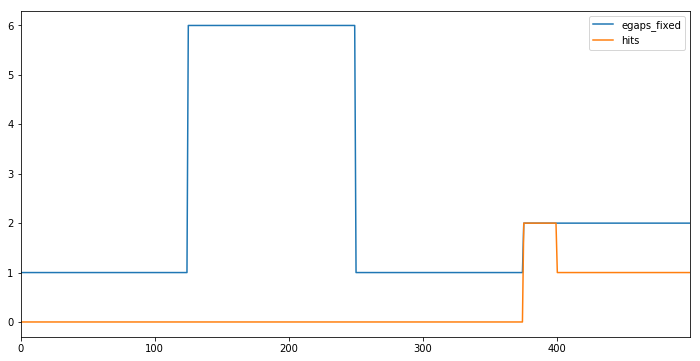

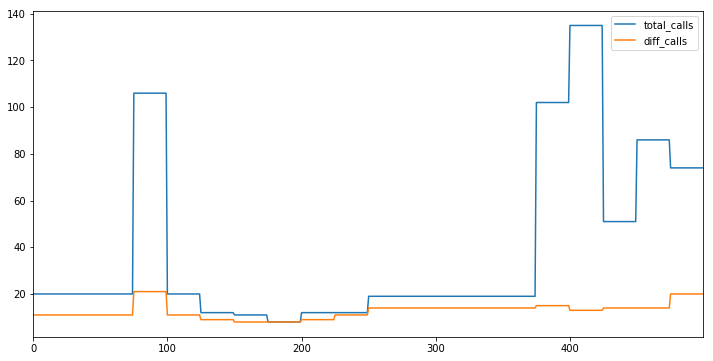

In [8]:
df[['egaps_fixed', 'hits']].plot(figsize=figsize)
df[['total_calls', 'diff_calls']].plot(figsize=figsize)

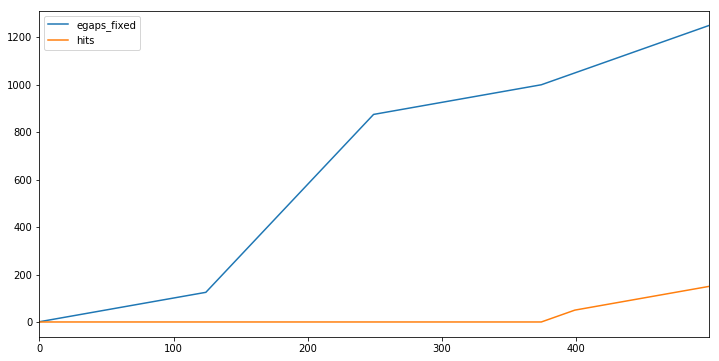

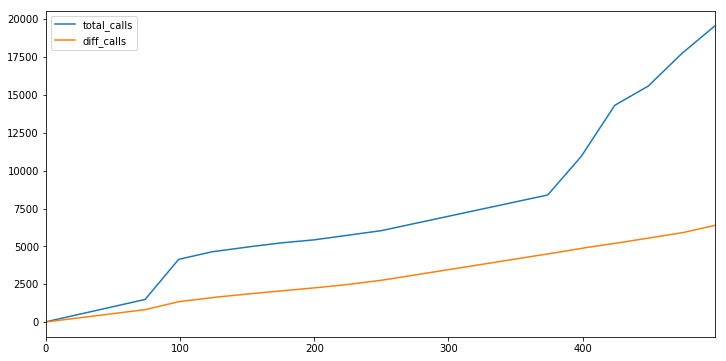

In [9]:
gl = df[['egaps_fixed', 'hits']].copy()
gl.cumsum().plot(figsize=figsize)
gl = df[['total_calls', 'diff_calls']].copy()
gl.cumsum().plot(figsize=figsize)

In [10]:
df['egaps_fixed'].value_counts()[:10]

1    250
6    125
2    125
Name: egaps_fixed, dtype: int64

In [11]:
df['hits'].value_counts()[:10]

0    375
1    100
2     25
Name: hits, dtype: int64

### Feature engineering
- Has Hits, whether the number of hits is greater than zero
- Equal Egaps and Hits, whether the number of egaps fixed is equal to the number of hits
- Ratio Hits, ratio between egaps fixed and hits
- Ration calls, ration between total number of calls and different methods calls
- Energy diff, True if energy after is lower than energy before, False otherwise
- Time diff, True if time after is lower than time before, False otherwise
- Energy percentage, Energy gain/loss in percentage comparing the before and after
- Time percentage, Time gain/loss in percentage comparing the before and after

In [12]:
df['has_hits'] = df['hits'] > 0
df['eq_egaps_hits'] = df['egaps_fixed'] == df['hits']
df['ratio_hits'] = df['egaps_fixed'] / df['hits']
df['ratio_calls'] = df['total_calls'] / df['diff_calls']
df['energy_diff'] = df['energy_before'] > df['energy_after']
df['time_diff'] = df['time_before'] > df['time_after']
df['energy_pct'] = -(100 - df['energy_after'] * 100 / df['energy_before'])
df['time_pct'] = -(100 - df['time_after'] * 100 / df['time_before'])
df = df.fillna(0)
df = df.round(2)
gg = group_rows(df.copy())

In [13]:
df = df.drop(['energy_before', 'energy_after', 'time_before', 'time_after'], axis=1)

In [14]:
df.sample(bag)

,egaps_fixed,hits,total_calls,diff_calls,has_hits,eq_egaps_hits,ratio_hits,ratio_calls,energy_diff,time_diff,energy_pct,time_pct
362,1,0,19,14,False,False,inf,1.36,False,False,106.400002,105.750000
115,1,0,20,11,False,False,inf,1.82,True,True,-4.900000,-3.090000
118,1,0,20,11,False,False,inf,1.82,True,True,-5.920000,-3.770000
131,6,0,12,9,False,False,inf,1.33,False,False,117.239998,118.199997
281,1,0,19,14,False,False,inf,1.36,False,False,84.599998,85.099998


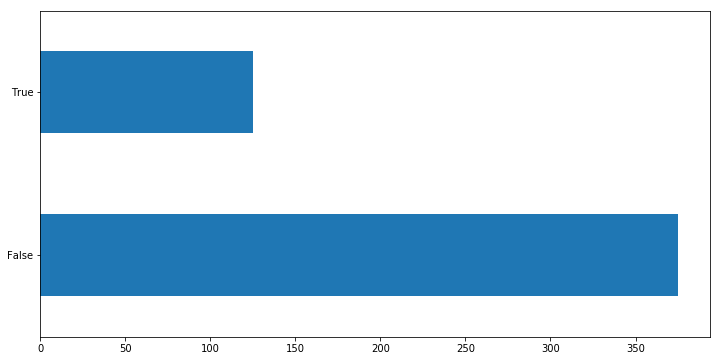

In [15]:
df['has_hits'].value_counts().plot.barh(figsize=figsize)

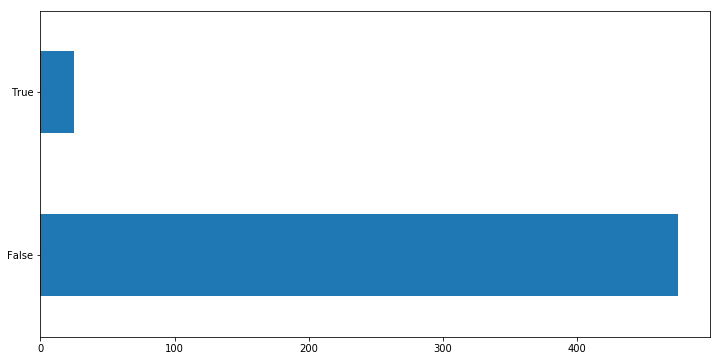

In [16]:
df['eq_egaps_hits'].value_counts().plot.barh(figsize=figsize)

In [17]:
df['energy_diff'].value_counts()

False    375
True     125
Name: energy_diff, dtype: int64

In [18]:
df['time_diff'].value_counts()

False    418
True      82
Name: time_diff, dtype: int64

In [19]:
dff = df[df['total_calls'] == df['diff_calls']]
if not dff.empty:
    dff.sample(bag)

In [20]:
dff = df[df['energy_diff'] == True]
if not dff.empty:
    dff.sample(bag)

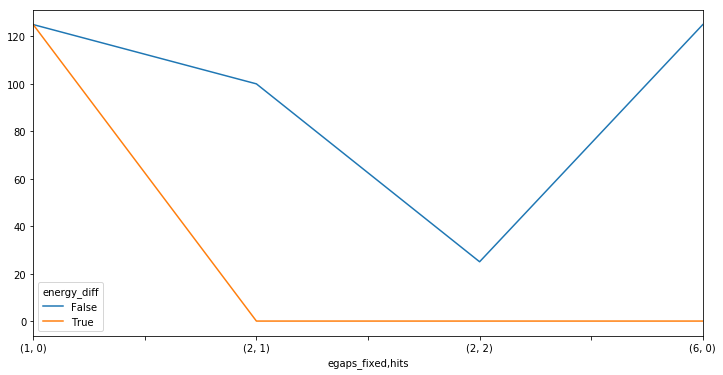

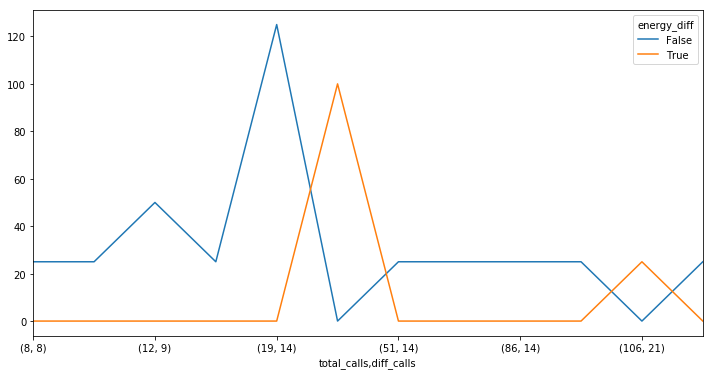

In [21]:
df.groupby(['egaps_fixed', 'hits'])['energy_diff'].value_counts().unstack().fillna(0).plot(figsize=figsize)
df.groupby(['total_calls', 'diff_calls'])['energy_diff'].value_counts().unstack().fillna(0).plot(figsize=figsize)

In [44]:
df.groupby(['egaps_fixed', 'hits', 'energy_diff'])['energy_pct'].mean().unstack().fillna(0)

energy_diff            False     True 
egaps_fixed hits                      
1           0      89.714081 -14.86272
2           1      82.486603   0.00000
            2      85.099998   0.00000
6           0     117.722878   0.00000

In [23]:
df.groupby(['total_calls', 'diff_calls'])['energy_diff'].value_counts().unstack().fillna(0)

energy_diff             False  True 
total_calls diff_calls              
8           8            25.0    0.0
11          8            25.0    0.0
12          9            50.0    0.0
            11           25.0    0.0
19          14          125.0    0.0
20          11            0.0  100.0
51          14           25.0    0.0
74          20           25.0    0.0
86          14           25.0    0.0
102         15           25.0    0.0
106         21            0.0   25.0
135         13           25.0    0.0

In [24]:
def output_info(dff, col, title):
    print('* %s for [%s]:' % (title, col))
    print('* Count %d' % dff[col].count())
    print('* Energy change %.2f' % -(100 - dff['energy_pct'].mean()))
    print('* Time change %.2f' % -(100 - dff['time_pct'].mean()))
    print('* Energy/Time change difference %.2f' % abs(dff['energy_pct'].mean() - dff['time_pct'].mean()))
    print('* Ratio calls %.2f' % dff['ratio_calls'].mean())

output_info(dff, 'energy_diff', 'Positive cases')

* Positive cases for [energy_diff]:
* Count 125
* Energy change -114.86
* Time change -99.87
* Energy/Time change difference 15.00
* Ratio calls 2.47


In [25]:
dff = df[df['time_diff'] == True]
if not dff.empty:
    dff.sample(bag)

In [26]:
output_info(dff, 'time_diff', 'Positive cases')

* Positive cases for [time_diff]:
* Count 82
* Energy change -114.06
* Time change -103.47
* Energy/Time change difference 10.58
* Ratio calls 2.80


In [27]:
dff = df[df['energy_diff'] == False]
if not dff.empty:
    dff.sample(bag)

In [28]:
output_info(dff, 'energy_diff', 'Negative cases')

* Negative cases for [energy_diff]:
* Count 375
* Energy change -3.18
* Time change -1.23
* Energy/Time change difference 1.95
* Ratio calls 2.91


In [29]:
dff = df[df['time_diff'] == False]
if not dff.empty:
    dff.sample(bag)

In [30]:
output_info(dff, 'time_diff', 'Negative cases')

* Negative cases for [time_diff]:
* Count 418
* Energy change -14.83
* Time change -10.67
* Energy/Time change difference 4.16
* Ratio calls 2.79


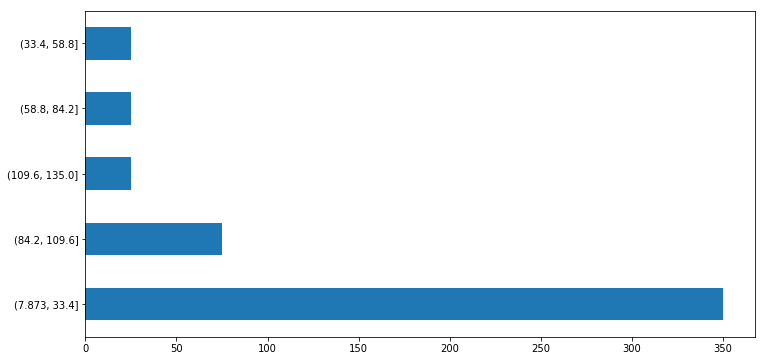

In [31]:
df['bin'] = pd.cut(df['total_calls'], bins=5)
df['bin'].value_counts().plot.barh(figsize=figsize)

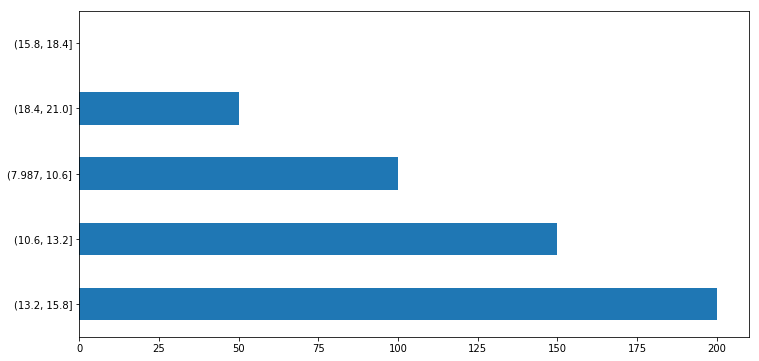

In [32]:
df['bin'] = pd.cut(df['diff_calls'], bins=5)
df['bin'].value_counts().plot.barh(figsize=figsize)